# Importing

In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from scipy import optimize
import sklearn.metrics as metrics

import warnings

import time
import datetime


# Importing data

       Wavelength (nm)  Intensity (a.u.)
count      1000.000000       1000.000000
mean        374.604527          0.059191
std          43.312359          0.127629
min         299.600000          0.000009
25%         337.053050          0.003805
50%         374.655665          0.015790
75%         412.108400          0.047725
max         449.411290          0.996490 Index(['Wavelength (nm)', 'Intensity (a.u.)'], dtype='object')


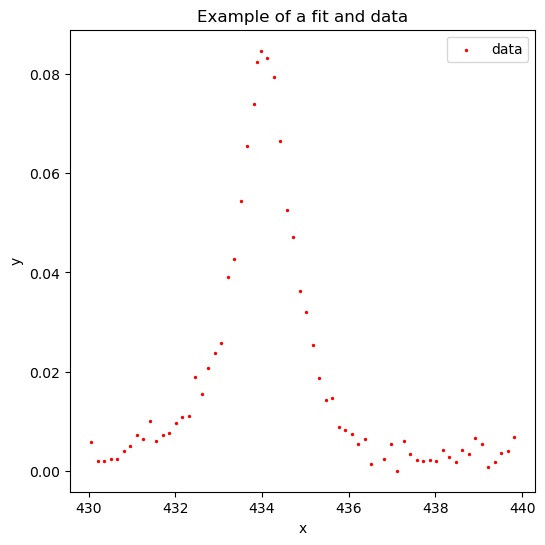

In [3]:
from scipy.special import wofz

def Gauss(x, y0, a, x0, sigma):#https://stackoverflow.com/questions/59049433/fitting-voigt-function-to-data-in-python
    return y0 + a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def Voigt(x, x0, y0, a, sigma, gamma):#https://stackoverflow.com/questions/59049433/fitting-voigt-function-to-data-in-python
    #sigma = alpha / np.sqrt(2 * np.log(2))

    return y0 + a * np.real(wofz((x - x0 + 1j*gamma)/sigma/np.sqrt(2))) / sigma /np.sqrt(2*np.pi)


## Generating/getting data
data = pd.read_csv("Spectrum.txt", delimiter="\t")
print(data.describe(), data.columns)
x = data[data.columns[0]]
y = data[data.columns[1]]

lowerIndex = (np.abs(x - 430)).argmin()
upperIndex = (np.abs(x - 440)).argmin()

x=x[lowerIndex:upperIndex]
y=y[lowerIndex:upperIndex]

fig, ax = plt.subplots(1, 1, figsize = (6,6))# Make a plot.
ax.scatter(x, y, label="data", s=2, marker="o", color='r')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Example of a fit and data")
ax.legend()
plt.show()

# Fitting data

Fit parameters: [4.34045711e+02 9.91270263e-04 1.77612968e-01 1.89172600e-01
 6.27743687e-01] with standard deviation [0.00941896 0.00055774 0.00634503 0.07272753 0.05075378]
MAPE = 785.4605242303924 , MAE = 0.0017051322480918605 , MSE = 4.543015324718995e-06 , R2 = 0.9919668297187185


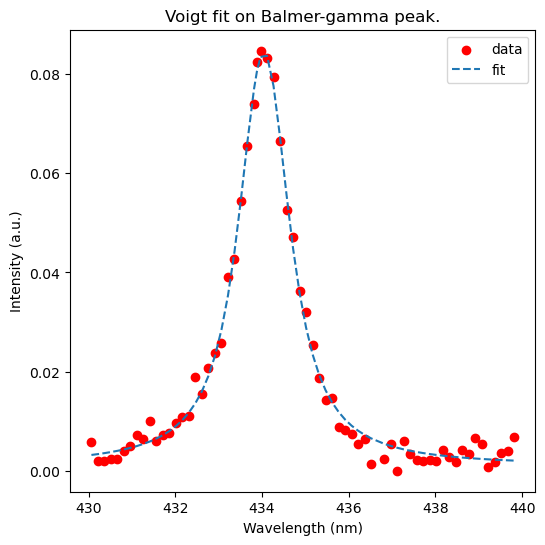

In [4]:
sigmaGuess=1
gammaGuess=1
startingParameters = [434, np.max(y), -(np.max(y)-np.min(y)), sigmaGuess, gammaGuess]# Optional starting values of the parameters
popt, pcov = optimize.curve_fit(Voigt, x, y, startingParameters)# Make the fit.

fit = Voigt(x, *popt)# Get the results of the fit.
print("Fit parameters:", popt, "with standard deviation", np.sqrt(np.diag(pcov)))
print("MAPE =", 100*metrics.mean_absolute_percentage_error(y, fit), ", MAE =", metrics.mean_absolute_error(y, fit), ", MSE =", metrics.mean_squared_error(y, fit), ", R2 =", metrics.r2_score(y, fit))#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## Ploting data
fig, ax = plt.subplots(1, 1, figsize = (6,6))# Make a plot.
ax.scatter(x, y, label="data", marker="o", color='r')
ax.plot(x, fit, linestyle="--", label="fit")
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Intensity (a.u.)")
ax.set_title("Voigt fit on Balmer-gamma peak.")
ax.legend()
plt.show()

fig.savefig('VoigtFit.pdf', dpi=1200)